# Data Quality Check and ETL

## Setup

### Importing Modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

### Importing Data

In [33]:
item_categories = pd.read_csv("data/item_categories.csv")
shops = pd.read_csv("data/shops.csv")
items = pd.read_csv("data/items.csv")

sales_train = pd.read_csv("data/sales_train.csv")

## Data Quality Check

In this section, we will provide some data analysis for each of the DataFrames we have and study them in the context of the following criteria:

1. NULL-values
2. Outliers (using __boxplots__)
3. Uniqueness
4. Data Format
5. Distributions

Also one important thing to notice, is that `item_categories`, `shops` and `items` are dataframes with supplemental information about the shops or the items. Also, all features in this DataFrames must be categorical, so for this 3 DataFrames we can just check

1. NULL-values
2. Uniqueness
3. Data Format

### Item Categories

#### General Observations

In [23]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


#### NULL-values

In [30]:
item_categories.isna().sum()

item_category_name    0
item_category_id      0
dtype: int64

As you can notice, there is no null-values in `item_categories` DataFrame 

#### Uniqueness

In [38]:
for feature in item_categories.columns:
	print(f" {feature} 's non-unique values : {item_categories.shape[0] - len(item_categories[feature].unique())}")

 item_category_name 's non-unique values : 0
 item_category_id 's non-unique values : 0


As you can notice, all values `item_categories` are unique

#### Data Format

In [39]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


We can notice, that _`item_category_id`_ feature has __int64__ data type, and we need to fix it

In [63]:
item_categories_formatted = item_categories.copy()
item_categories_formatted["item_category_id"] = item_categories_formatted["item_category_id"].astype("object")
item_categories_formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


### Items

#### General Observations

In [52]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


#### NULL-values

In [55]:
items.isna().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

As you can notice, there is no null-values in `items` DataFrame 

#### Uniqueness

In [56]:
for feature in items.columns:
	print(f" {feature} 's non-unique values : {items.shape[0] - len(items[feature].unique())}")

 item_name 's non-unique values : 0
 item_id 's non-unique values : 0
 item_category_id 's non-unique values : 22086


As you can notice, all features in `items` are unique except of _`item_category_id`_, which can have repeated values, so it is nothing to fix here

#### Data Format

In [57]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


We can notice, that _`item_category_id`_ and `item_id` features have __int64__ data type, and we need to fix it

In [62]:
items_formatted = items.copy()
items_formatted["item_category_id"] = items_formatted["item_category_id"].astype("object")
items_formatted["item_id"] = items_formatted["item_id"].astype("object")
items_formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  object
 2   item_category_id  22170 non-null  object
dtypes: object(3)
memory usage: 519.7+ KB


### Shops

#### General Observations

In [64]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


#### NULL-values

In [65]:
shops.isna().sum()

shop_name    0
shop_id      0
dtype: int64

As you can notice, there is no null-values in `shops` DataFrame 

#### Uniqueness

In [67]:
for feature in shops.columns:
	print(f" {feature} 's non-unique values : {shops.shape[0] - len(shops[feature].unique())}")

 shop_name 's non-unique values : 0
 shop_id 's non-unique values : 0


As you can notice, all values in `shops` are unique

#### Data Format

In [68]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


We can notice, that _`shop_id`_ feature has __int64__ data type, and we need to fix it

In [69]:
shops_formatted = shops.copy()
shops_formatted["shop_id"] = shops_formatted["shop_id"].astype("object")
shops_formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


### Sales

#### General Observation

In [70]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


#### NULL-values

In [103]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [85]:
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

As you can see, there is no missing values in `sales`, but also you can notice, that minimal value for _`item_price`_ and _`item_cnt_day`_ are negative. It is impossible for item to have negative or zero price or for shop to sell negative amount of items. So we can this values as missing.


In [108]:
sales_train[(sales_train["item_price"] <= 0) | (sales_train["item_cnt_day"] <= 0)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


As we can see there is only 7357 objects with missing values, which is relatively small amount of objects, so the best approach is just to drop them from dataset

In [109]:
sales_train_nna = sales_train[(sales_train["item_price"] > 0) & (sales_train["item_cnt_day"] > 0)]
sales_train_nna

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


#### Outliers

<Axes: xlabel='item_price'>

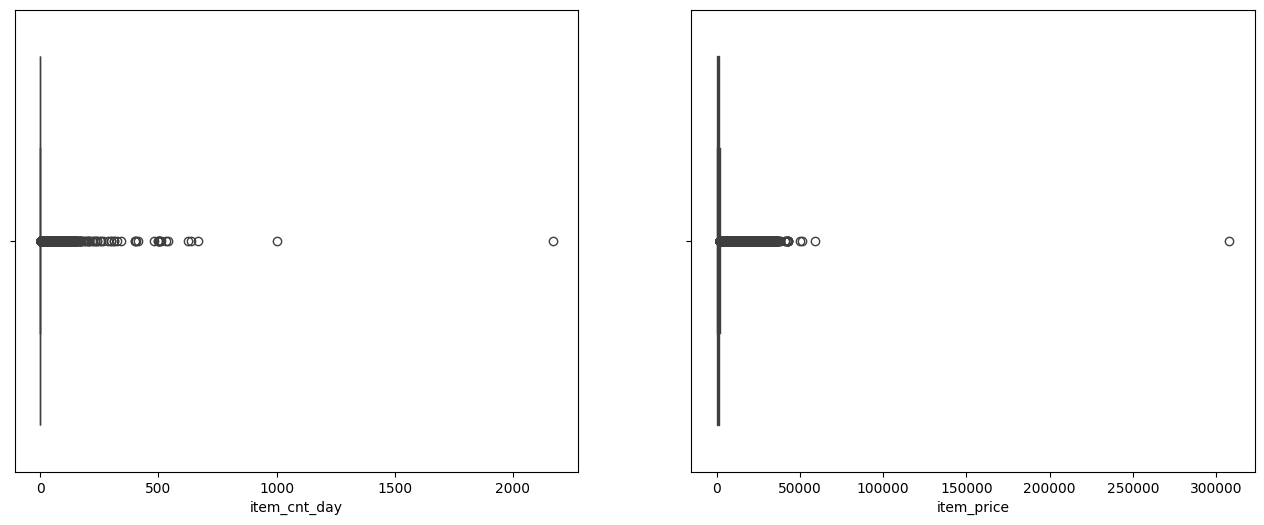

In [110]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)

sns.boxplot(sales_train_nna, x="item_cnt_day")

plt.subplot(1, 2, 2)
sns.boxplot(sales_train_nna, x="item_price")

As you can see there is a lot of outliers here. Lets compute lower and upper bounds for outliers 

In [112]:
item_price_IQR = sales_train["item_price"].quantile(0.75) - sales_train["item_price"].quantile(0.25)
item_price_lower_bound = sales_train["item_price"].quantile(0.25) - 1.5 * item_price_IQR 
item_price_upper_bound = sales_train["item_price"].quantile(0.75) + 1.5 * item_price_IQR 

item_cnt_day_IQR = sales_train["item_cnt_day"].quantile(0.75) - sales_train["item_cnt_day"].quantile(0.25)
item_cnt_day_lower_bound = sales_train["item_cnt_day"].quantile(0.25) - 1.5 * item_cnt_day_IQR
item_cnt_day_upper_bound = sales_train["item_cnt_day"].quantile(0.75) + 1.5 * item_cnt_day_IQR

In [114]:
sales_train[sales_train["item_cnt_day"] < item_cnt_day_lower_bound]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [102]:
sales_train[sales_train["item_cnt_day"] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


<Axes: xlabel='item_price', ylabel='Count'>

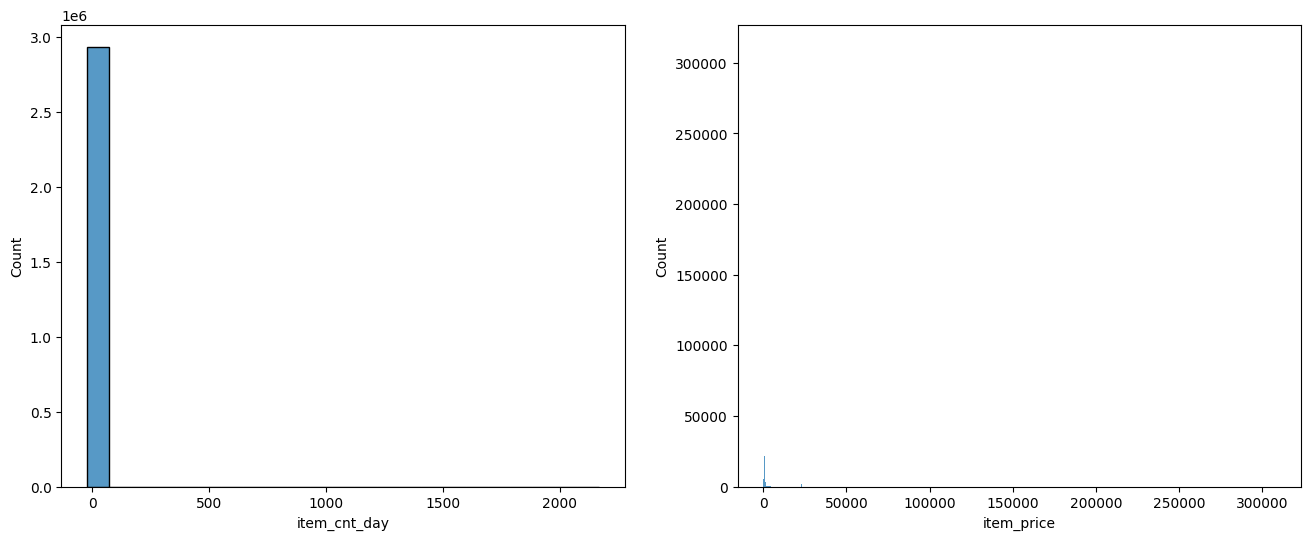

In [84]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)

sns.histplot(sales_train, x="item_cnt_day")

plt.subplot(1, 2, 2)
sns.histplot(sales_train, x="item_price")

In [82]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03
